In [1]:
using QuantumOptics
using Plots
using LaTeXStrings

In [2]:
# Basis definitions 
ha = SpinBasis(1//2)
hc = FockBasis(100)

h = hc ⊗ ha

[Fock(cutoff=100) ⊗ Spin(1/2)]

In [45]:
# Operator definitions
σp = sigmap(ha)
σm = sigmam(ha)
a = destroy(hc)
n = number(hc)

# Parameters
MHz = 1
μs = 1
Δ = 0.1MHz
g = 5MHz

#H = g*(a⊗σp + a'⊗σm)
H(t, ψ; Δ=1.1MHz, g=1MHz) = g*(a⊗σp*exp(-1im*2π*Δ*t) + a'⊗σm*exp(+1im*2π*Δ*t))


H2

H (generic function with 2 methods)

$$
    \hat{H}^{(2)} =  g_{TCG} (\hat{a}^\dagger \hat{a} - |e\rangle\langle e| - 2\hat{a}^\dagger\hat{a}|e\rangle\langle e|)
$$
where,
$$
    g_1 = \frac{1}{\overline{\omega}} \left [ e^{-\overline{\omega}^2 \tau^2} - 1 \right ] \\
    g_2 = \left [ e^{-\Delta^2 \tau^2} - 1 \right ] \frac{1}{\Delta} \\
    g_{TCG} = g_1 - g_2
$$

In [131]:
I_atom = identityoperator(ha)
I_cav = identityoperator(hc)

function H_TCG(t, ψ; Δ=0, Σ=300MHz, g=1MHz, τ=0.2μs)
    if !iszero(Δ)
        g_tcg = 1/Σ*(exp(-Σ^2*τ^2) - 1) - 1/Δ*(exp(-Δ^2*τ^2) - 1)
    else
        g_tcg = 1/Σ*(exp(-Σ^2*τ^2 - 1)) 
    end
    H_2 = g_tcg*(a'*a ⊗ I_atom - I_cav ⊗ (σp*σm) - 2*(a'*a) ⊗ (σp*σm))  
    return exp(-0.5*Δ^2*τ^2)*H(t, ψ; Δ=Δ, g=g) + H_2
end

H_TCG (generic function with 1 method)

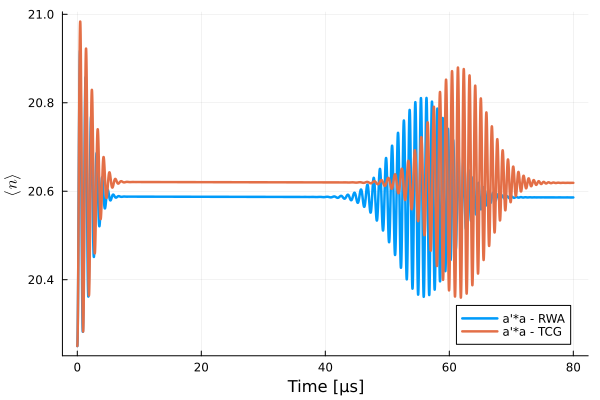

In [138]:
tspan = [0:0.01:80μs;]
ψ0 = coherentstate(hc, 4.5) ⊗ spinup(ha)
tout, ψt = timeevolution.schroedinger_dynamic(tspan, ψ0, (t, ψ) -> H(t, ψ; Δ=2π*0.1MHz, g=2π*0.1MHz));
tout, ψt_2 = timeevolution.schroedinger_dynamic(tspan, ψ0, (t, ψ) -> H_TCG(t, ψ; Δ=2π*0.1MHz, Σ=2π*4MHz, g=2π*0.1MHz, τ=0.2μs));

plot(tout, real(expect(1, n, ψt)), lw=2.5, label="a'*a - RWA");
plot!(tout, real(expect(1, n, ψt_2)), lw=2.5, label="a'*a - TCG");
xlabel!("Time [μs]")
ylabel!(L"$\langle n \rangle$")